In [1]:
import pandas as pd

df = pd.read_csv("../../data/raw/Crash_Reporting_Drivers_Data.csv")
df.head()

C:\Users\Zhaokai\AppData\Local\Temp\ipykernel_11156\4144606215.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../../data/raw/Crash_Reporting_Drivers_Data.csv")


,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
0,DD5620004G,190046109,Rockville Police Departme,Property Damage Crash,09/26/2019 07:20:00 AM,NaN,NaN,NaN,NaN,PARKING LOT,...,15,No,No,2017,THOMAS,BUS,NO MISUSE,39.103518,-77.157669,"(39.10351817, -77.15766933)"
1,MCP29620057,200023865,Montgomery County Police,Property Damage Crash,06/18/2020 02:00:00 AM,County,DAIRYMAID DR,County,METZ DR,NaN,...,35,No,No,2020,UNK,UNK,UNKNOWN,39.154847,-77.271245,"(39.15484667, -77.271245)"
2,MCP2651004P,210035267,Montgomery County Police,Property Damage Crash,09/08/2021 12:30:00 PM,NaN,NaN,NaN,NaN,PARKING LOT OF 10109 COLESVILLE RD,...,0,No,No,2010,TOYOTA,SUV,UNKNOWN,39.020303,-77.011436,"(39.02030267, -77.01143583)"
3,MCP3050004K,200016465,Montgomery County Police,Property Damage Crash,04/19/2020 03:39:00 PM,County,RUSSETT RD,County,ARCTIC AVE,NaN,...,25,No,No,2004,DODGE,GRAND CARAVAN,NO MISUSE,39.080062,-77.097845,"(39.08006167, -77.097845)"
4,MCP2641001J,200016526,Montgomery County Police,Injury Crash,04/20/2020 09:15:00 AM,County,ARCHDALE RD,County,GUNNERS BRANCH RD,NaN,...,25,No,No,2006,HONDA,CR-V,UNKNOWN,39.175230,-77.241090,"(39.17523, -77.24109)"


In [2]:
# number of rows, number of columns for dataset
nrow,ncol=df.shape
nrow,ncol

(159357, 43)

In [3]:
# We have following data types of variables float64(2), int64(2), object(39). 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159357 entries, 0 to 159356
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Report Number                   159357 non-null  object 
 1   Local Case Number               159357 non-null  object 
 2   Agency Name                     159357 non-null  object 
 3   ACRS Report Type                159357 non-null  object 
 4   Crash Date/Time                 159357 non-null  object 
 5   Route Type                      143710 non-null  object 
 6   Road Name                       144586 non-null  object 
 7   Cross-Street Type               143684 non-null  object 
 8   Cross-Street Name               144577 non-null  object 
 9   Off-Road Description            14769 non-null   object 
 10  Municipality                    17700 non-null   object 
 11  Related Non-Motorist            5019 non-null    object 
 12  Collision Type  

In [4]:
# according to the output of last code section df.info(), we will remove columns with small amount of non-null count values
new_df=df.drop(["Off-Road Description","Municipality","Related Non-Motorist","Non-Motorist Substance Abuse","Circumstance"],axis=1)

# we will also remove "Driverless Vehicle", according to its values distribution below, we can tell this column is meaningless.
# df["Driverless Vehicle"].value_counts()
# No         158668
# Unknown       689
# Name: Driverless Vehicle, dtype: int64
new_df=new_df.drop(["Driverless Vehicle"],axis=1)

# we also remove columns that are not related to this study.
new_df=new_df.drop(["Road Name","Cross-Street Type","Cross-Street Name","Report Number","Local Case Number","Agency Name",
        "Person ID", "Drivers License State","Vehicle ID","Latitude","Longitude"],axis=1)

# During the data cleaning stage, the researcher found out most values from the columns related to the vehicle category are
# corrupted and contaminated. As a consequence, the researcher had to give up the factors under the vehicle categories. 
new_df=new_df.drop(["Vehicle Year","Vehicle Make","Vehicle Model","Vehicle Going Dir","Vehicle Continuing Dir",
                    "Vehicle Movement","Vehicle Body Type","Vehicle Second Impact Location","Vehicle First Impact Location",
                    "Parked Vehicle","Vehicle Damage Extent","Equipment Problems"],axis=1)

# Considering the ACRS Report Type is more similar to another target attribute, this study"s class attribute is injury severity.
# As a result, this column needs to be removed.  
print(new_df["ACRS Report Type"].value_counts())
new_df=new_df.drop(["ACRS Report Type"],axis=1)
new_df.info()

Property Damage Crash    101048
Injury Crash              57913
Fatal Crash                 396
Name: ACRS Report Type, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159357 entries, 0 to 159356
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Crash Date/Time         159357 non-null  object
 1   Route Type              143710 non-null  object
 2   Collision Type          158820 non-null  object
 3   Weather                 146879 non-null  object
 4   Surface Condition       140664 non-null  object
 5   Light                   158035 non-null  object
 6   Traffic Control         135447 non-null  object
 7   Driver Substance Abuse  130386 non-null  object
 8   Driver At Fault         159357 non-null  object
 9   Injury Severity         159357 non-null  object
 10  Driver Distracted By    159357 non-null  object
 11  Speed Limit             159357 non-null  int64 
 12  Location 

In [5]:
new_df["Crash Date/Time"].value_counts()
# There is no missing value for this field. 
# However, the Crash Date/Time can not be used directly for study, 
# because the length is too big to manage
# So, it is a more reasonable way to convert this column into two new columns
# 1. day of the week
# 2. time of the day

12/10/2018 06:10:00 PM    11
06/09/2020 06:53:00 PM    10
03/03/2017 06:00:00 AM    10
03/28/2019 09:30:00 AM    10
05/17/2017 03:36:00 PM     9
                          ..
09/10/2015 10:30:00 PM     1
06/30/2018 02:02:00 AM     1
08/23/2018 08:32:00 PM     1
02/20/2023 02:05:00 PM     1
05/09/2023 02:56:00 AM     1
Name: Crash Date/Time, Length: 87470, dtype: int64

In [6]:
# Adding column Day of Week
from datetime import datetime
def convert_to_day_of_week(date_format:str,date_string:str):
    date_object = datetime.strptime(date_string,date_format)
    day_of_week = date_object.weekday()
    day_name_list = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    day_name = day_name_list[day_of_week]
    return day_name

def apply_conversion(datetime):
    return convert_to_day_of_week("%m/%d/%Y %I:%M:%S %p", datetime)

new_df["Day of Week"]=new_df["Crash Date/Time"].apply(apply_conversion)
new_df["Day of Week"].value_counts()


Friday       25701
Tuesday      24992
Thursday     24831
Wednesday    24554
Monday       23034
Saturday     19790
Sunday       16455
Name: Day of Week, dtype: int64

In [7]:
# Adding column Time of Day
from datetime import datetime
def convert_to_time_of_day(date_format:str,date_string:str):
    date_object = datetime.strptime(date_string,date_format)
    hour = date_object.hour
    if 0<= hour <6:
        return "dawn"
    elif 6 <= hour < 12:
        return "morning"
    elif 12<= hour <18:
        return "afternoon"
    else: 
        return "evening"

def apply_conversion(datetime):
    return convert_to_time_of_day("%m/%d/%Y %I:%M:%S %p", datetime)

new_df["Time of Day"]=new_df["Crash Date/Time"].apply(apply_conversion)
new_df["Time of Day"].value_counts()

afternoon    65690
morning      45568
evening      37233
dawn         10866
Name: Time of Day, dtype: int64

In [8]:
# Now the Time of Day and Day of Week Columns are generated. 
# Therefore, the Crash Date/Time can be removed.
new_df = new_df.drop(["Crash Date/Time"],axis=1)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159357 entries, 0 to 159356
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Route Type              143710 non-null  object
 1   Collision Type          158820 non-null  object
 2   Weather                 146879 non-null  object
 3   Surface Condition       140664 non-null  object
 4   Light                   158035 non-null  object
 5   Traffic Control         135447 non-null  object
 6   Driver Substance Abuse  130386 non-null  object
 7   Driver At Fault         159357 non-null  object
 8   Injury Severity         159357 non-null  object
 9   Driver Distracted By    159357 non-null  object
 10  Speed Limit             159357 non-null  int64 
 11  Location                159357 non-null  object
 12  Day of Week             159357 non-null  object
 13  Time of Day             159357 non-null  object
dtypes: int64(1), object(13)
memory usage

In [9]:
print(new_df["Route Type"].value_counts())
# Based on the output of the value counts,
# There are three types of rows that needed to be removed
# Due to the ambiguous meaning of the value 
# 1. other public roadway
# 2. government
# 3. unknown

new_df=new_df.loc[(new_df["Route Type"]!="Government")
           &(new_df["Route Type"]!="Other Public Roadway")
           &(new_df["Route Type"]!="Unknown")]
print("---------------After removal---------------")
print(new_df["Route Type"].value_counts())

Maryland (State)        71500
County                  51339
Municipality             8713
US (State)               6926
Interstate (State)       2985
Other Public Roadway     1053
Government                612
Ramp                      523
Service Road               40
Unknown                    19
Name: Route Type, dtype: int64
---------------After removal---------------
Maryland (State)      71500
County                51339
Municipality           8713
US (State)             6926
Interstate (State)     2985
Ramp                    523
Service Road             40
Name: Route Type, dtype: int64


In [10]:
print(new_df["Collision Type"].value_counts())
# Based on the output of the value counts,
# The rows contains unknown in collision type column will be removed
new_df=new_df.loc[(new_df["Collision Type"]!="UNKNOWN")]
# The reason why we did not impute the "OTHER" value
# It could be a type different from all these types of accidents
# Other here is meaningful
print("---------------After removal---------------")
print(new_df["Collision Type"].value_counts())

SAME DIR REAR END               51626
STRAIGHT MOVEMENT ANGLE         27621
OTHER                           17384
SAME DIRECTION SIDESWIPE        14813
SINGLE VEHICLE                  14437
HEAD ON LEFT TURN               11723
SAME DIRECTION RIGHT TURN        3479
SAME DIRECTION LEFT TURN         3425
HEAD ON                          3417
OPPOSITE DIRECTION SIDESWIPE     2618
ANGLE MEETS LEFT TURN            1870
ANGLE MEETS RIGHT TURN           1114
SAME DIR REND LEFT TURN           685
SAME DIR REND RIGHT TURN          683
UNKNOWN                           667
SAME DIR BOTH LEFT TURN           648
ANGLE MEETS LEFT HEAD ON          639
OPPOSITE DIR BOTH LEFT TURN       294
Name: Collision Type, dtype: int64
---------------After removal---------------
SAME DIR REAR END               51626
STRAIGHT MOVEMENT ANGLE         27621
OTHER                           17384
SAME DIRECTION SIDESWIPE        14813
SINGLE VEHICLE                  14437
HEAD ON LEFT TURN               11723
SAME DIRE

In [11]:
print(new_df["Weather"].value_counts())
new_df=new_df.loc[(new_df["Weather"]!="UNKNOWN")&
                  (new_df["Weather"]!="OTHER")]
print("---------------After removal---------------")
print(new_df["Weather"].value_counts())

CLEAR                       106110
RAINING                      18884
CLOUDY                       15991
SNOW                          1401
FOGGY                          624
UNKNOWN                        517
WINTRY MIX                     381
OTHER                          337
SLEET                          209
SEVERE WINDS                   153
BLOWING SNOW                   111
BLOWING SAND, SOIL, DIRT        13
Name: Weather, dtype: int64
---------------After removal---------------
CLEAR                       106110
RAINING                      18884
CLOUDY                       15991
SNOW                          1401
FOGGY                          624
WINTRY MIX                     381
SLEET                          209
SEVERE WINDS                   153
BLOWING SNOW                   111
BLOWING SAND, SOIL, DIRT        13
Name: Weather, dtype: int64


In [12]:
print(new_df["Surface Condition"].value_counts())
new_df=new_df.loc[(new_df["Surface Condition"]!="UNKNOWN")&
                  (new_df["Surface Condition"]!="OTHER")]
print("---------------After removal---------------")
print(new_df["Surface Condition"].value_counts())

DRY                       109664
WET                        25982
ICE                          936
SNOW                         917
UNKNOWN                      211
SLUSH                        192
OTHER                        155
MUD, DIRT, GRAVEL             45
WATER(STANDING/MOVING)        37
OIL                           24
SAND                           4
Name: Surface Condition, dtype: int64
---------------After removal---------------
DRY                       109664
WET                        25982
ICE                          936
SNOW                         917
SLUSH                        192
MUD, DIRT, GRAVEL             45
WATER(STANDING/MOVING)        37
OIL                           24
SAND                           4
Name: Surface Condition, dtype: int64


In [13]:
print(new_df["Light"].value_counts())
new_df=new_df.loc[(new_df["Light"]!="UNKNOWN")&
                  (new_df["Light"]!="OTHER")&
                  (new_df["Light"]!="DARK -- UNKNOWN LIGHTING")]
print("---------------After removal---------------")
new_df["Light"].value_counts()

DAYLIGHT                    105499
DARK LIGHTS ON               35966
DARK NO LIGHTS                4486
DUSK                          3604
DAWN                          3090
DARK -- UNKNOWN LIGHTING      1285
OTHER                          315
UNKNOWN                        266
Name: Light, dtype: int64
---------------After removal---------------


DAYLIGHT          105499
DARK LIGHTS ON     35966
DARK NO LIGHTS      4486
DUSK                3604
DAWN                3090
Name: Light, dtype: int64

In [14]:
print(new_df["Traffic Control"].value_counts())
new_df=new_df.loc[(new_df["Traffic Control"]!="UNKNOWN")&
                  (new_df["Traffic Control"]!="OTHER")
                  ]
print("---------------After removal---------------")
new_df["Traffic Control"].value_counts()

NO CONTROLS                60897
TRAFFIC SIGNAL             53135
STOP SIGN                  11159
FLASHING TRAFFIC SIGNAL     1890
OTHER                       1793
YIELD SIGN                  1620
PERSON                       256
WARNING SIGN                 146
UNKNOWN                      120
RAILWAY CROSSING DEVICE       42
SCHOOL ZONE SIGN DEVICE       14
Name: Traffic Control, dtype: int64
---------------After removal---------------


NO CONTROLS                60897
TRAFFIC SIGNAL             53135
STOP SIGN                  11159
FLASHING TRAFFIC SIGNAL     1890
YIELD SIGN                  1620
PERSON                       256
WARNING SIGN                 146
RAILWAY CROSSING DEVICE       42
SCHOOL ZONE SIGN DEVICE       14
Name: Traffic Control, dtype: int64

In [15]:
print(new_df["Driver Substance Abuse"].value_counts())
new_df=new_df.loc[(new_df["Driver Substance Abuse"]!="OTHER")]
print("---------------After removal---------------")
print(new_df["Driver Substance Abuse"].value_counts())

# if it is not non detected, unknown, or null value
# the value will be converted to detected.
def convert_substance_abuse_levels(src):
    if(src == "NONE DETECTED" or src =="UNKNOWN" or src == None):
        return src
    else:
        return"DETECTED"

new_df["Driver Substance Abuse"]=new_df["Driver Substance Abuse"].map(convert_substance_abuse_levels)
print("---------------After Converting---------------")
print(new_df["Driver Substance Abuse"].value_counts())
# replace unknown with null values and then, forward fill imputation for null values.
new_df["Driver Substance Abuse"] = new_df["Driver Substance Abuse"].replace("UNKNOWN",None)
new_df["Driver Substance Abuse"] = new_df["Driver Substance Abuse"].fillna(method="ffill")
print("---------------After imputation---------------")
print(new_df["Driver Substance Abuse"] .value_counts())



NONE DETECTED                 109687
UNKNOWN                         9467
ALCOHOL PRESENT                 3609
ALCOHOL CONTRIBUTED             1269
ILLEGAL DRUG PRESENT             238
MEDICATION PRESENT               108
ILLEGAL DRUG CONTRIBUTED          89
COMBINED SUBSTANCE PRESENT        82
MEDICATION CONTRIBUTED            57
OTHER                             57
COMBINATION CONTRIBUTED           43
Name: Driver Substance Abuse, dtype: int64
---------------After removal---------------
NONE DETECTED                 109687
UNKNOWN                         9467
ALCOHOL PRESENT                 3609
ALCOHOL CONTRIBUTED             1269
ILLEGAL DRUG PRESENT             238
MEDICATION PRESENT               108
ILLEGAL DRUG CONTRIBUTED          89
COMBINED SUBSTANCE PRESENT        82
MEDICATION CONTRIBUTED            57
COMBINATION CONTRIBUTED           43
Name: Driver Substance Abuse, dtype: int64
---------------After Converting---------------
NONE DETECTED    109687
DETECTED          3279

In [16]:
print(new_df["Driver At Fault"].value_counts())
new_df=new_df.loc[(new_df["Driver At Fault"]!="Unknown")]
print("---------------After removal---------------")
new_df["Driver At Fault"].value_counts()

Yes        81064
No         67055
Unknown     3831
Name: Driver At Fault, dtype: int64
---------------After removal---------------


Yes    81064
No     67055
Name: Driver At Fault, dtype: int64

In [17]:
# same process as handling "Driver Substance Abuse" is performed here.
print(new_df["Driver Distracted By"].value_counts())

def convert_distracted_levels(src):
    if(src == "NOT DISTRACTED" or src =="UNKNOWN" or src == None):
        return src
    else:
        return"DISTRACTED"

new_df["Driver Distracted By"]=new_df["Driver Distracted By"].map(convert_distracted_levels)
print("---------------After removal---------------")
print(new_df["Driver Distracted By"].value_counts())

# Imputes unknown field. Using forward imputation. 
print("---------------After imputation---------------")
new_df["Driver Distracted By"] = new_df["Driver Distracted By"].replace("UNKNOWN",None)
new_df["Driver Distracted By"] = new_df["Driver Distracted By"].fillna(method="ffill")
new_df["Driver Distracted By"] .value_counts()

NOT DISTRACTED                                       93773
UNKNOWN                                              25964
LOOKED BUT DID NOT SEE                               18661
INATTENTIVE OR LOST IN THOUGHT                        3790
OTHER DISTRACTION                                     2825
DISTRACTED BY OUTSIDE PERSON OBJECT OR EVENT           855
BY OTHER OCCUPANTS                                     381
OTHER CELLULAR PHONE RELATED                           332
OTHER ELECTRONIC DEVICE (NAVIGATIONAL PALM PILOT)      301
TALKING OR LISTENING TO CELLULAR PHONE                 261
NO DRIVER PRESENT                                      221
BY MOVING OBJECT IN VEHICLE                            191
EATING OR DRINKING                                     177
ADJUSTING AUDIO AND OR CLIMATE CONTROLS                123
USING OTHER DEVICE CONTROLS INTEGRAL TO VEHICLE         80
TEXTING FROM A CELLULAR PHONE                           59
USING DEVICE OBJECT BROUGHT INTO VEHICLE                

NOT DISTRACTED    113632
DISTRACTED         34487
Name: Driver Distracted By, dtype: int64

In [18]:
# summary statistics for numeric attributes
new_df.describe()
# Although "Speed Limit" attribute is a numeric attribute
# The data is organized as categorical. 
# We will reduce levels from 15 to 5.
print(new_df["Speed Limit"].value_counts())
levels = ["0-10","15-25","30-40","45-55","60-70"]
bins = [0, 10, 25, 40, 55, 70]
new_df["Speed Limit"] = pd.cut(new_df["Speed Limit"], bins= bins,labels=levels)
new_df["Speed Limit"] = new_df["Speed Limit"].astype("category")
print("---------------After convert---------------") 
print(new_df["Speed Limit"].value_counts())



35    43337
40    29880
30    20084
25    19985
45    11162
15     5056
50     4184
0      3930
55     3534
5      3424
10     2499
20      925
60       62
65       52
70        5
Name: Speed Limit, dtype: int64
---------------After convert---------------
30-40    93301
15-25    25966
45-55    18880
0-10      5923
60-70      119
Name: Speed Limit, dtype: int64


In [19]:
# hint: use this before you print large amount of data
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)

In [20]:
# remove all rows that contain null values.
new_df = new_df.dropna(how="any")
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105379 entries, 3 to 159356
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   Route Type              105379 non-null  object  
 1   Collision Type          105379 non-null  object  
 2   Weather                 105379 non-null  object  
 3   Surface Condition       105379 non-null  object  
 4   Light                   105379 non-null  object  
 5   Traffic Control         105379 non-null  object  
 6   Driver Substance Abuse  105379 non-null  object  
 7   Driver At Fault         105379 non-null  object  
 8   Injury Severity         105379 non-null  object  
 9   Driver Distracted By    105379 non-null  object  
 10  Speed Limit             105379 non-null  category
 11  Location                105379 non-null  object  
 12  Day of Week             105379 non-null  object  
 13  Time of Day             105379 non-null  object  
dtypes: c

In [21]:
# Count the occurrences of each unique value in the class attribute "Injury Severity"
new_df["Injury Severity"].value_counts()

NO APPARENT INJURY          84376
POSSIBLE INJURY             11873
SUSPECTED MINOR INJURY       8108
SUSPECTED SERIOUS INJURY      956
FATAL INJURY                   66
Name: Injury Severity, dtype: int64

In [22]:
# according to the output of last code section, 130578(NO APPARENT INJURY)/159357(total rows) = 81.9% 
# we can tell that the multi-class problem has imbalanced class distributions. reducing number of classes could help address the issue. we will deal with
# imbalanced class distributions later.
# A large number of classes can increase the complexity of the classification problem, by reducing the number of classes, we can simplify the problem
# and make it more manageable for the model to learn the distinguishing features, which may lead to better performance.

# for target variable "Injury Severity", convert 5 classes to 3 classes
new_df["Injury Severity"]=new_df["Injury Severity"].map({"NO APPARENT INJURY":"No Injury","POSSIBLE INJURY":"Minor Injury","SUSPECTED MINOR INJURY":"Minor Injury","SUSPECTED SERIOUS INJURY":"Serious Injury",
                                             "FATAL INJURY":"Serious Injury"})
new_df["Injury Severity"].value_counts()

No Injury         84376
Minor Injury      19981
Serious Injury     1022
Name: Injury Severity, dtype: int64

In [23]:
# convert each column data type from object to category, to improve efficiency during data modeling stage.
new_df = new_df.apply(lambda x:x.astype('category'))
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105379 entries, 3 to 159356
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   Route Type              105379 non-null  category
 1   Collision Type          105379 non-null  category
 2   Weather                 105379 non-null  category
 3   Surface Condition       105379 non-null  category
 4   Light                   105379 non-null  category
 5   Traffic Control         105379 non-null  category
 6   Driver Substance Abuse  105379 non-null  category
 7   Driver At Fault         105379 non-null  category
 8   Injury Severity         105379 non-null  category
 9   Driver Distracted By    105379 non-null  category
 10  Speed Limit             105379 non-null  category
 11  Location                105379 non-null  category
 12  Day of Week             105379 non-null  category
 13  Time of Day             105379 non-null  category
dtypes: c

In [24]:
# summary statistics for all columns
new_df.describe()

,Route Type,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Driver At Fault,Injury Severity,Driver Distracted By,Speed Limit,Location,Day of Week,Time of Day
count,105379,105379,105379,105379,105379,105379,105379,105379,105379,105379,105379,105379,105379,105379
unique,7,17,10,9,5,9,2,2,3,2,5,55772,7,4
top,Maryland (State),SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,Yes,No Injury,NOT DISTRACTED,30-40,"(38.953, -77.338)",Friday,afternoon
freq,54209,38119,76845,83103,73360,46384,84640,55157,84376,81402,73969,26,17081,43517


Summary statistics for Route Type:
Maryland (State)      54209
County                37754
Municipality           6272
US (State)             4846
Interstate (State)     1883
Ramp                    391
Service Road             24
Name: Route Type, dtype: int64

Summary statistics for Collision Type:
SAME DIR REAR END               38119
STRAIGHT MOVEMENT ANGLE         21153
HEAD ON LEFT TURN                9488
SAME DIRECTION SIDESWIPE         9378
SINGLE VEHICLE                   7760
OTHER                            7093
SAME DIRECTION RIGHT TURN        2320
SAME DIRECTION LEFT TURN         2189
HEAD ON                          2095
ANGLE MEETS LEFT TURN            1461
OPPOSITE DIRECTION SIDESWIPE     1394
ANGLE MEETS RIGHT TURN            852
SAME DIR REND RIGHT TURN          509
ANGLE MEETS LEFT HEAD ON          478
SAME DIR REND LEFT TURN           472
SAME DIR BOTH LEFT TURN           445
OPPOSITE DIR BOTH LEFT TURN       173
Name: Collision Type, dtype: int64

Summary statisti

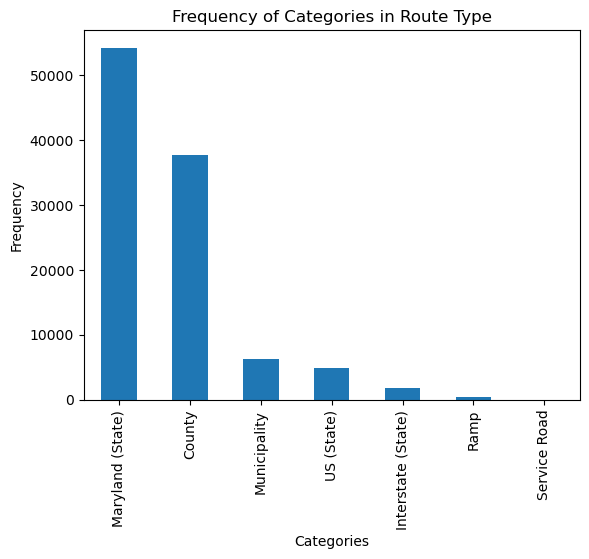

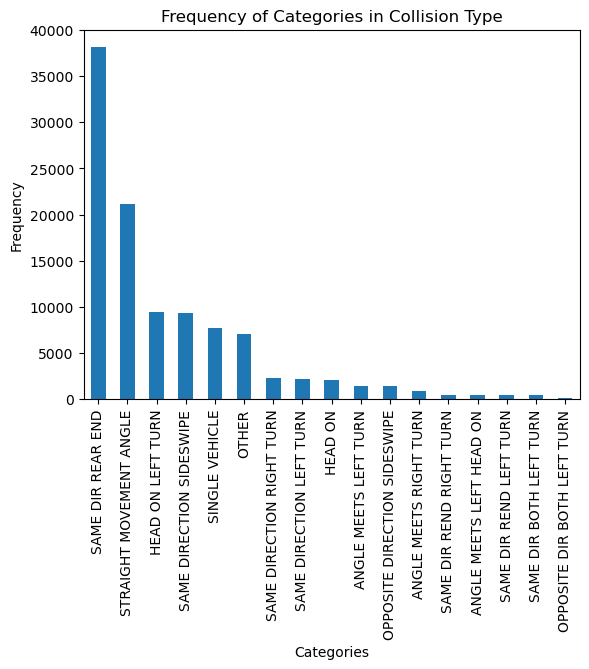

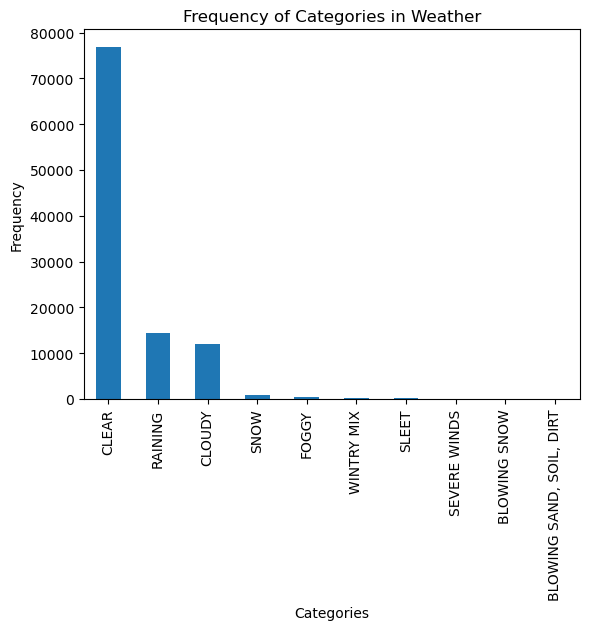

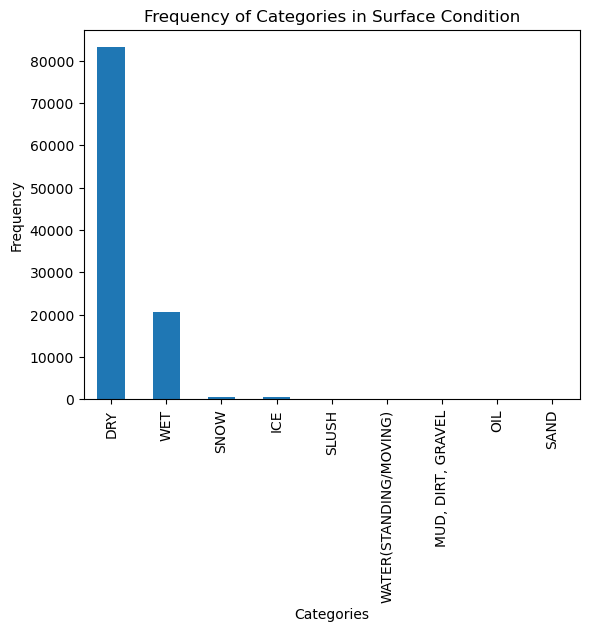

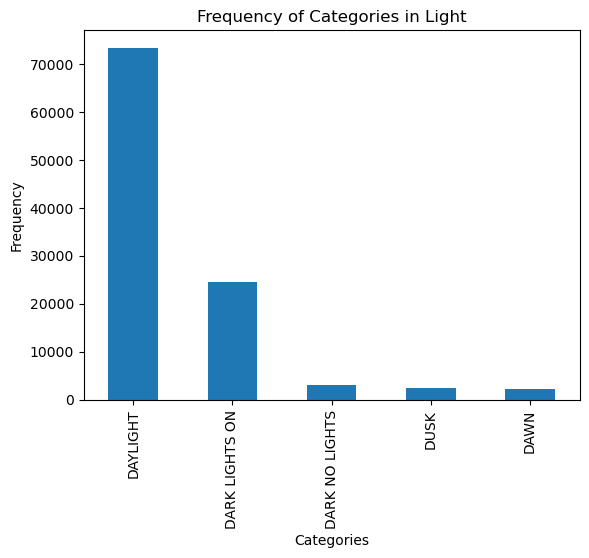

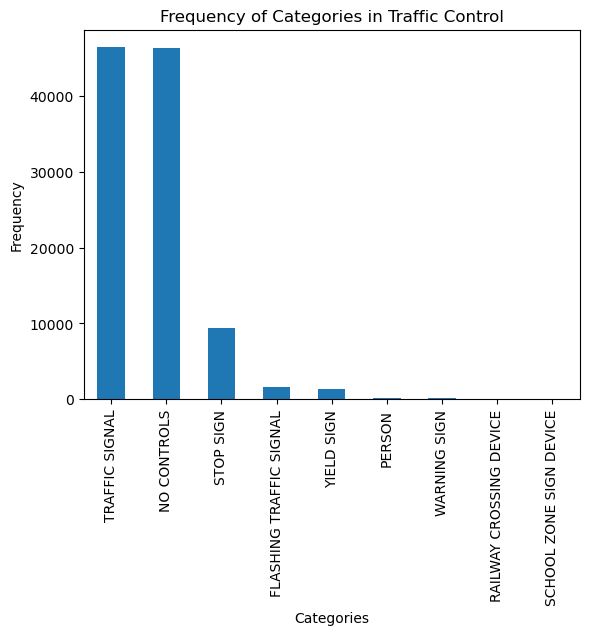

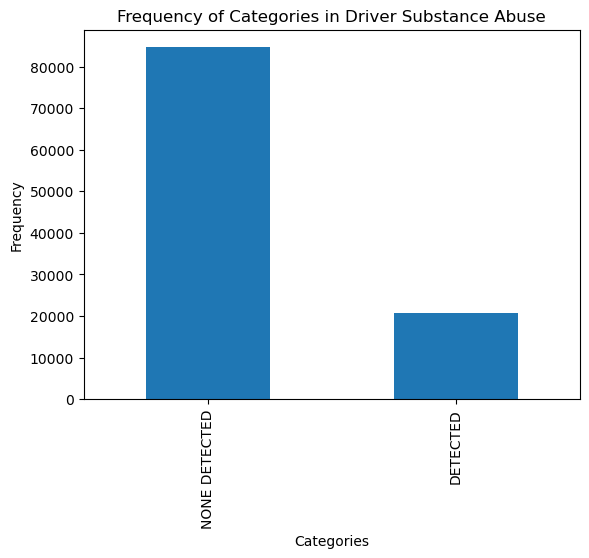

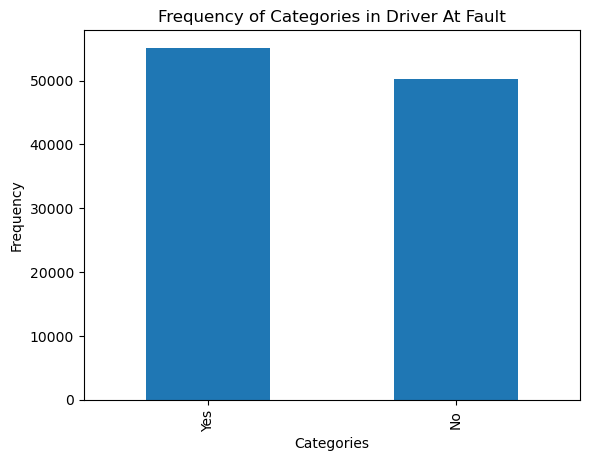

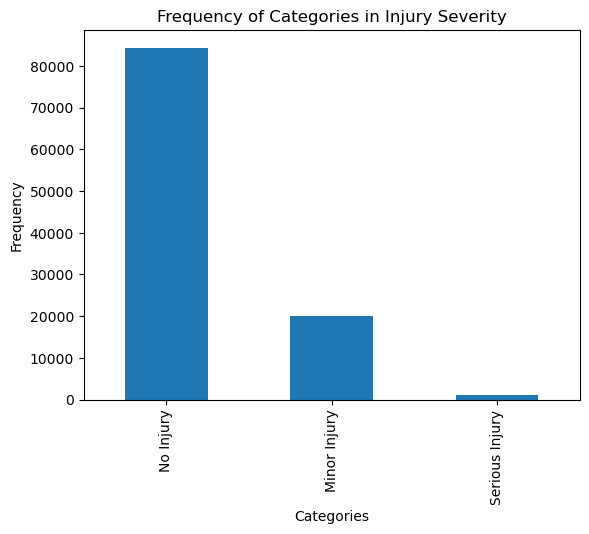

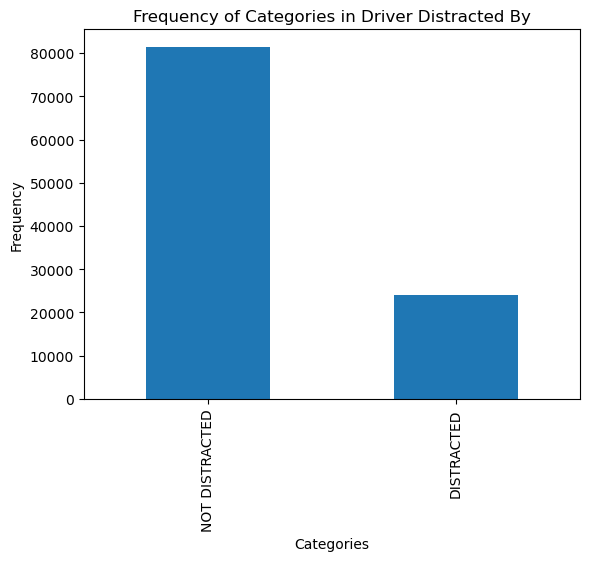

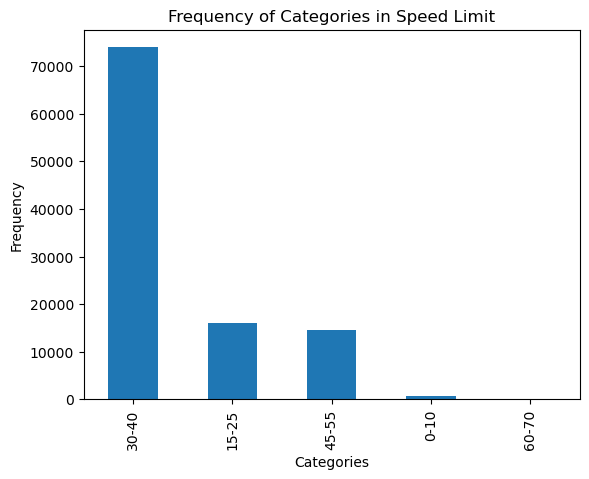

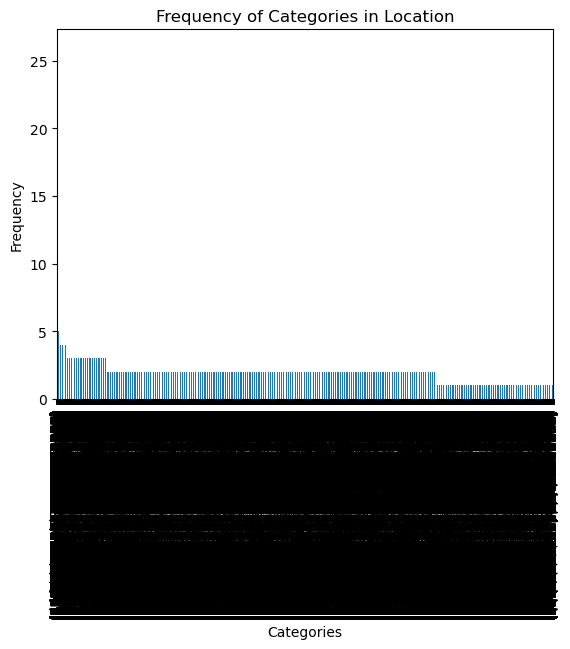

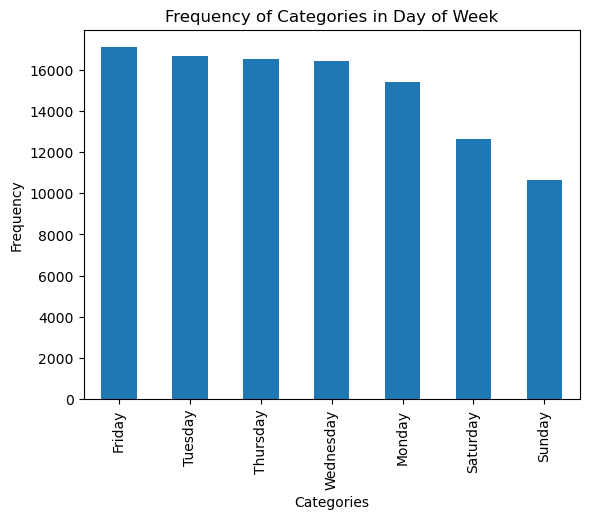

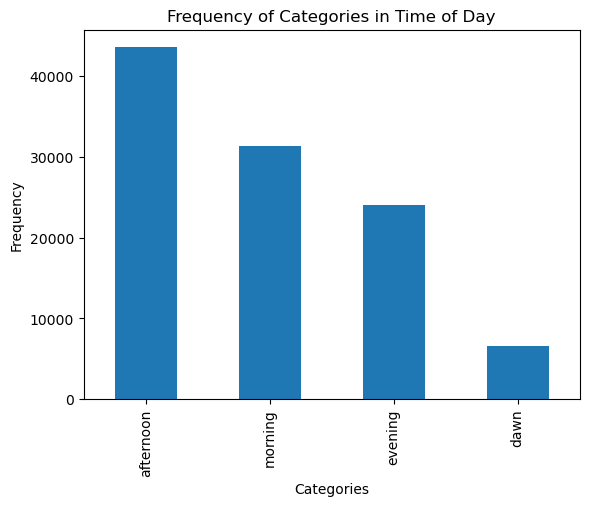

In [25]:
# Univariate visualization for all attributes
 
import matplotlib.pyplot as plt

col_summary = {}
for column in new_df.columns:
    col_summary[column] = new_df[column].value_counts()

# Print the summary statistics
for column, summary in col_summary.items():
    print(f"Summary statistics for {column}:")
    print(summary)
    print()

# Visualize the summary statistics using a bar plot
for column, summary in col_summary.items():
    summary.plot(kind='bar')
    plt.title(f"Frequency of Categories in {column}")
    plt.xlabel("Categories")
    plt.ylabel("Frequency")
    plt.show()

                        Route Type  Collision Type  Weather  Surface Condition   Light  Traffic Control  Driver Substance Abuse  Driver At Fault  Injury Severity  Driver Distracted By  Speed Limit  Location  Day of Week  Time of Day
Route Type                  1.0000         -0.0083  -0.0361            -0.0440 -0.0097           0.0769                  0.0031          -0.0416           0.0000                0.0159       0.1060   -0.1024       0.0053      -0.0057
Collision Type             -0.0083          1.0000   0.0110             0.0077 -0.0181          -0.0439                  0.0201           0.0513          -0.0054               -0.0316      -0.0258   -0.0089      -0.0136      -0.0003
Weather                    -0.0361          0.0110   1.0000             0.7511 -0.0111          -0.0037                  0.0133           0.0103          -0.0141                0.0305       0.0034    0.0323      -0.0176       0.0325
Surface Condition          -0.0440          0.0077   0.7511         

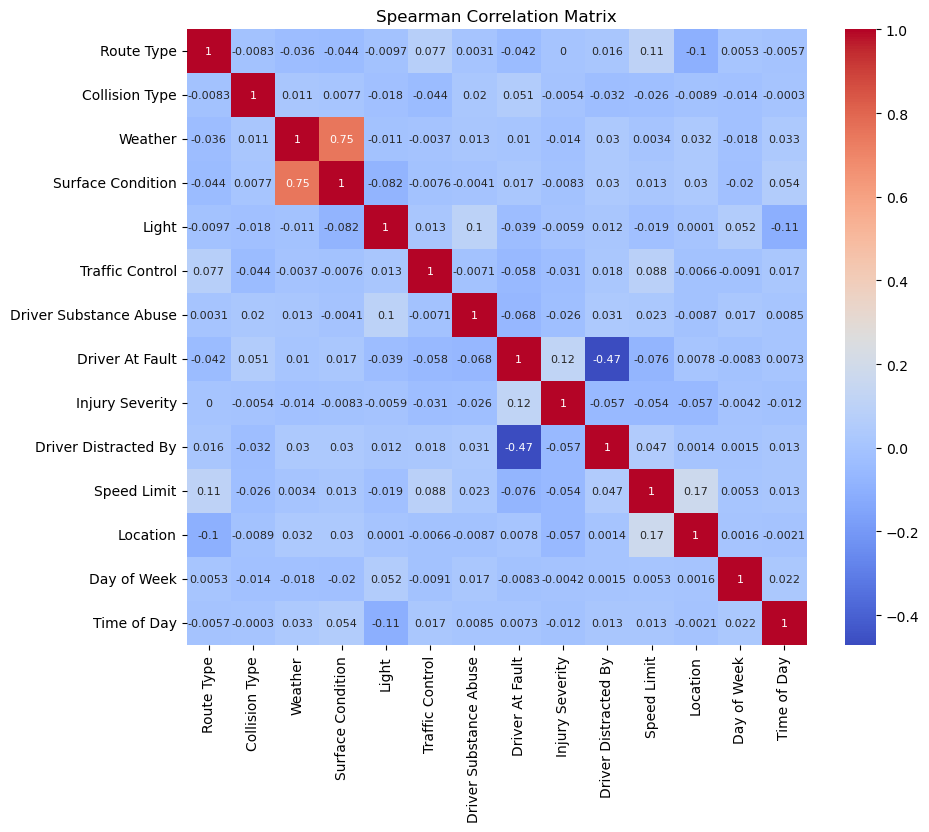

In [26]:
# spearman correlation matrix and heatmap

import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

new_df_numeric = new_df.apply(lambda x: x.cat.codes)
correlation_matrix = new_df_numeric.corr(method="spearman",numeric_only=False)
rounded_matrix = np.round(correlation_matrix,decimals=4)
print(rounded_matrix)
plt.figure(figsize=(10,8))
sb.heatmap(rounded_matrix, annot=True, annot_kws={"size": 8}, cmap="coolwarm")
plt.title("Spearman Correlation Matrix")
plt.show()



In [27]:
# very powerful package, however, it is very complicated to use.
# need to spend more time to understand Cramér's V and dython.

# import dython as dy
# from dython.nominal import associations
# from dython.nominal import identify_nominal_columns

# associations(new_df)




In [28]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105379 entries, 3 to 159356
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   Route Type              105379 non-null  category
 1   Collision Type          105379 non-null  category
 2   Weather                 105379 non-null  category
 3   Surface Condition       105379 non-null  category
 4   Light                   105379 non-null  category
 5   Traffic Control         105379 non-null  category
 6   Driver Substance Abuse  105379 non-null  category
 7   Driver At Fault         105379 non-null  category
 8   Injury Severity         105379 non-null  category
 9   Driver Distracted By    105379 non-null  category
 10  Speed Limit             105379 non-null  category
 11  Location                105379 non-null  category
 12  Day of Week             105379 non-null  category
 13  Time of Day             105379 non-null  category
dtypes: c